# Name: S. Jignyas Anand
# ID: 2100080021
# Branch: AI&DS

In [1]:
!git clone https://github.com/JignyasAnand/Brain-Disease-Classification.git

Cloning into 'Brain-Disease-Classification'...
remote: Enumerating objects: 15686, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15686 (delta 0), reused 10 (delta 0), pack-reused 15672
Receiving objects: 100% (15686/15686), 234.04 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (18427/18427), done.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Pre-process

In [3]:
def structure_datasets(base_dir="/content/Brain-Disease-Classification/datasets"):
  for dataset in os.listdir(base_dir):
    ds_path = os.path.join(base_dir, dataset)
    print(ds_path)
    conts = os.listdir(ds_path)
    if ("train" in conts) and ("test" in conts):
      continue
    train_dir = os.path.join(ds_path, "Train")
    test_dir = os.path.join(ds_path, "Test")

    if os.path.isdir(train_dir) and os.path.isdir(test_dir):
      continue
    os.mkdir(train_dir)
    os.mkdir(test_dir)

    for class_name in conts:
      # img_paths = os.path.join(ds_path, os.listdir(os.path.join(ds_path, class_name)))
      img_paths = [os.path.join(ds_path, class_name, i) for i in os.listdir(os.path.join(ds_path, class_name))]
      labels = [class_name for i in range(len(img_paths))]
      if len(img_paths)==0:
        continue
      print(img_paths)
      x_train, x_test, _, _ = train_test_split(img_paths, labels, random_state=43, test_size=0.4)

      os.mkdir(os.path.join(train_dir, class_name))
      os.mkdir(os.path.join(test_dir, class_name))

      for img in x_train:
        shutil.copy(img, os.path.join(train_dir, class_name))

      for img in x_test:
        shutil.copy(img, os.path.join(test_dir, class_name))

      shutil.rmtree(os.path.join(ds_path, class_name))

structure_datasets()

/content/Brain-Disease-Classification/datasets/Alzheimer_s Dataset
/content/Brain-Disease-Classification/datasets/Tumor
/content/Brain-Disease-Classification/datasets/Brain Stroke


In [4]:
def get_ds_splits(ds_name, base_dir="/content/Brain-Disease-Classification/datasets", target_size=(124, 124),ignore=False):
  IMAGE_SIZE = target_size
  ds_path = os.path.join(base_dir, ds_name)

  conts = os.listdir(ds_path)

  if ("Train" not in conts) or ("Test" not in conts):
    return "ERROR: Splits not detected"
  train_dir = os.path.join(ds_path, "Train")
  test_dir = os.path.join(ds_path, "Test")

  single_class = os.listdir(train_dir)[0]
  single_class_img = os.listdir(os.path.join(train_dir, single_class))[0]
  dims = np.asarray(PIL.Image.open(os.path.join(train_dir, single_class, single_class_img))).shape

  channels = None
  if len(dims)>=3:
    color_mode="rgb"
    channels = dims[-1]
  else:
    color_mode = "grayscale"
    channels=1
  if ignore:
    channels = 3
    color_mode = "rgb"
  print("COLOR MODE : ", color_mode)

  train_ds = image_dataset_from_directory(
      train_dir,
      color_mode = color_mode,
      image_size = IMAGE_SIZE,
      shuffle=True,
      seed = 21,
      batch_size = 32
  )


  test_ds = image_dataset_from_directory(
      test_dir,
      color_mode = color_mode,
      image_size = IMAGE_SIZE,
      batch_size = 32,
      shuffle=True,
      seed = 21
  )


  return channels, train_ds, test_ds

In [5]:


# base_dir = "/content/Brain-Disease-Classification/datasets/Tumor/Train/"

# for i in os.listdir(base_dir):
#   class_dir = os.path.join(base_dir, i)
#   for img in os.listdir(class_dir):
#     img_path = os.path.join(class_dir, img)
#     x = Image.open(img_path)
#     x.show()
#     print(img_path)
#     break
#   break

In [6]:
# x = Image.open("/content/Brain-Disease-Classification/datasets/Tumor/Train/notumor/Te-no_0403.jpg")

In [8]:
def resize_and_save(img_path, img_name):
  x = Image.open(img_path)
  x = x.resize((124, 124))
  x = x.convert("RGB")
  x.save(img_name)

In [10]:
# tmp = None
# for i in os.listdir(base_dir):
#   class_dir = os.path.join(base_dir, i)
#   for img in os.listdir(class_dir):
#     img_path = os.path.join(class_dir, img)
#     x = Image.open(img_path)
#     tmp = np.array(x)
#     break
#   break
# plt.imshow(tmp)

In [12]:

# for i in train_ds:
#   plt.imshow(i[0][0])
#   break

In [34]:
# dataset_labels = train_ds.class_names

In [35]:
# print(train_ds.class_names)
# assert train_ds.class_names == test_ds.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']


In [13]:
from tensorflow.data import AUTOTUNE


In [39]:
# NUM_IMAGES = []

# train_dir = "/content/Brain-Disease-Classification/datasets/Alzheimer_s Dataset/Train"
# for cname in os.listdir(train_dir):
#   NUM_IMAGES.append(len(os.listdir(os.path.join(train_dir, cname))))
# print(NUM_IMAGES)

[537, 38, 1920, 1344]


In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import PIL

In [15]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )

    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

def get_model(shape):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=shape),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    return model

COLOR MODE :  grayscale
Found 3839 files belonging to 4 classes.
Found 1535 files belonging to 4 classes.


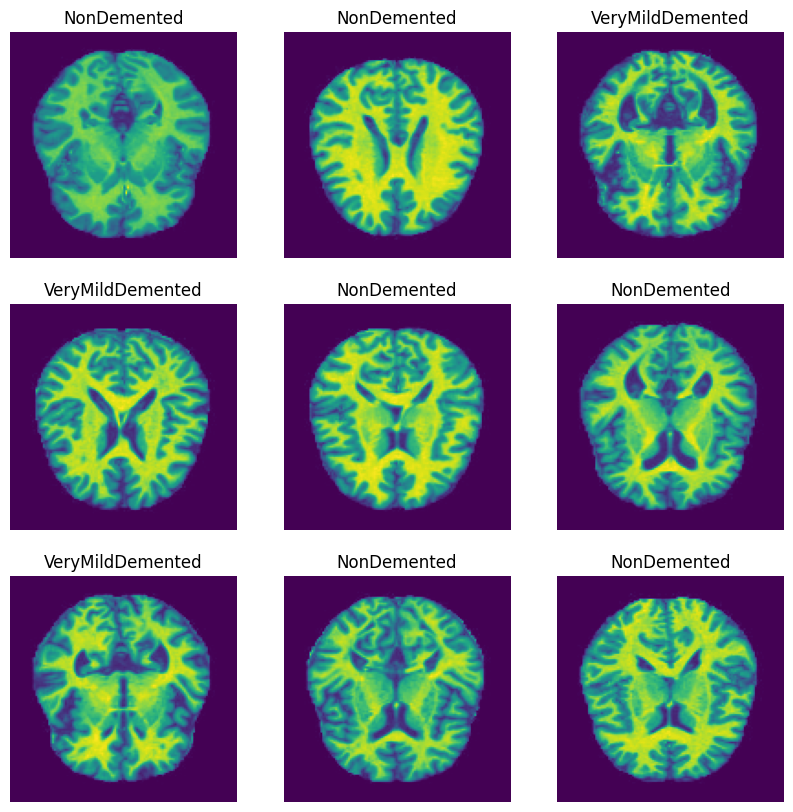

In [23]:
# ds_name = "Brain Stroke"
# ds_name = "Tumor"
ds_name = "Alzheimer_s Dataset"

channels, train_ds, test_ds = get_ds_splits(ds_name)

NUM_CLASSES = len(train_ds.class_names)
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


train_ds = train_ds.map(one_hot_label, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(one_hot_label, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
def train_and_save(train_ds, epochs, ds_name):
  model = get_model((124, 124, 1))
  # adam_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])
  METRICS = [tf.keras.metrics.AUC(name='auc')]

  checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(f"{ds_name}.h5",
                                                      save_best_only=True)

  early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                      restore_best_weights=True)
  CALLBACKS = [checkpoint_cb, early_stopping_cb]
  model.compile(
      optimizer='adam',
      loss=tf.losses.CategoricalCrossentropy(),
      metrics=METRICS
  )
  history = model.fit(
      train_ds,
      epochs=epochs,
      validation_data=test_ds,
      callbacks = CALLBACKS
  )
  model.save(f"{ds_name}_final.h5")

In [24]:
train_and_save(train_ds ,1 , ds_name)
# train_and_save(train_ds ,1 , "brain_stroke.h5", "brain_stroke_final.h5")
# train_and_save(train_ds ,1 , "brain_stroke.h5", "brain_stroke_final.h5")


120/120 [==============================] - 16s 50ms/step - loss: 1.7767 - auc: 0.5864 - val_loss: 1.2545 - val_auc: 0.7103


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
